In [1]:
import numpy as np
import sympy as sy
sy.init_printing()  
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# <font face="gotham" color="purple"> Similarity </font>

If $A = PBP^{-1}$, we say $A$ is _similar_ to $B$, decomposing $A$ into $PBP^{-1}$ is also called a _similarity transformation_.

If $n\times n$ matrices $A$ and $B$ are similar, they have the _same eigenvalues_.

The _diagnoalization_, which we will explain below,  is a process of finding similar matrices.

# <font face="gotham" color="purple"> Diagonalizable Matrix</font>

Let $A$ be an $n\times n$ matrix. If there exists an $n\times n$ invertible matrix $P$ and a diagonal matrix $D$, such that

$$
A=PDP^{-1}
$$

then matrix $A$ is called a _diagonalizable matrix_.

And further, the columns of $P$ are linearly independent eigenvectors of $A$, and its corresponding eigenvalues are on the diagonal of $D$. In other words, $A$ is diagonalizable if and only if the dimension of eigenspace basis is $n$</font>.

Let's show why this equation holds.

Let

$$
P = \left[\begin{array}{llll}
{v}_{1} & {v}_{2} & \cdots & {v}_{n}
\end{array}\right]\\
$$

$$
D = \left[\begin{array}{cccc}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & & \vdots \\
0 & 0 & \cdots & \lambda_{n}
\end{array}\right]
$$

where $v_i, i \in (1, 2, ...n)$ is an eigenvector of $A$, $\lambda_i, i \in (1, 2, ...n)$ is an eigenvalue of $A$.

$$
AP = A\left[\begin{array}{llll}
{v}_{1} & {v}_{2} & \cdots & {v}_{n}
\end{array}\right]=\left[\begin{array}{llll}
A {v}_{1} & A {v}_{2} & \cdots & A {v}_{n}
\end{array}\right]
$$

$$P D=P\left[\begin{array}{cccc}
\lambda_{1} & 0 & \cdots & 0 \\
0 & \lambda_{2} & \cdots & 0 \\
\vdots & \vdots & & \vdots \\
0 & 0 & \cdots & \lambda_{n}
\end{array}\right]=\left[\begin{array}{lllll}
\lambda_{1} {v}_{1} & \lambda_{2} {v}_{2} & \cdots & \lambda_{n} {v}_{n}
\end{array}\right]$$

We know that $A{v}_i = \lambda_i{v}_i$, i.e.

$$
AP = PD
$$

Since $P$ has all independent eigenvectors, then

$$
A = PDP^{-1}
$$

Strictly speaking, if $A$ is symmetric, i.e. $A=A^T$, what we have just shown is called **Spectral decomposition**, the similar matrix $D$ holds all the eigenvalues on its diagonal. And $P$ is orthogonal matrix, which means any of of its two columns are perpendicular. Therefore it could be rewritten as 
$$
A = PDP^{T}
$$

# <font face="gotham" color="purple"> Spectral Decomposition Visualization</font>

What these plots tells are actually the functions of each decomposed matrix, $P$ and $P^T$ are for rotation because they orthogonal, and $D$ are for scaling because it's diagonal.

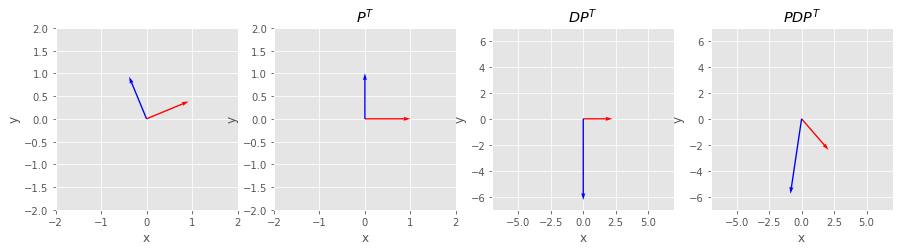

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix A
A = np.array([[1, 3], [3, -5]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Plot eigenvectors
fig, ax = plt.subplots(figsize=(15, 4), nrows=1, ncols=4)
for i in range(2):
    ax[0].quiver(0, 0, eigenvectors[:,i][0], eigenvectors[:,i][1], angles='xy', 
                 scale_units='xy', scale=1, color=['r','b'][i])
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-2, 2)

for i in range(4):
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_aspect('equal')

ax[1].quiver(0, 0, 1, 0, angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[1].quiver(0, 0, 0, 1, angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-2, 2)
ax[1].set_title('$P^T$')


ax[2].quiver(0, 0, eigenvalues[0], 0, angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[2].quiver(0, 0, 0, eigenvalues[1], angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[2].set_xlim(-7, 7)
ax[2].set_ylim(-7, 7)
ax[2].set_title('$DP^T$')

temp = np.array([[eigenvalues[0], 0],
                 [0, eigenvalues[1]]])
temp1 = temp@eigenvectors

ax[3].quiver(0, 0, temp1[:,0][0], temp1[:,0][1], angles='xy', 
             scale_units='xy', scale=1, color=['r'])
ax[3].quiver(0, 0, temp1[:,1][0], temp1[:,1][1], angles='xy', 
             scale_units='xy', scale=1, color=['b'])
ax[3].set_xlim(-7, 7)
ax[3].set_ylim(-7, 7)
ax[3].set_title('$PDP^T$')

plt.show()

However, in reality we don't have many chances of working on symmetric matrices, so spectral decomposition is mostly for theoretical demonstration, not so much application in reality.

# <font face="gotham" color="purple"> Diagonalizing a Matrix</font>

Consider a matrix

$$A=\left[\begin{array}{rrr}
1 & 3 & 3 \\
-3 & -5 & -3 \\
3 & 3 & 1
\end{array}\right]$$

We seek to diagonalize the matrix $A$.

Following these steps:

1. Compute the eigenvalues of $A$
2. Compute the eigenvectors of $A$
3. Construct $P$.
4. Construct $D$ from the corresponding columns of $P$.

In [3]:
A = sy.Matrix([[1,3,3], [-3, -5, -3], [3,3,1]])
eig = sy.matrices.matrices.MatrixEigen.eigenvects(A)
eig

⎡⎛       ⎡⎡-1⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡1 ⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜-2, 2, ⎢⎢1 ⎥, ⎢0 ⎥⎥⎟, ⎜1, 1, ⎢⎢-1⎥⎥⎟⎥
⎢⎜       ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣0 ⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

Reminder the return value takes the form ```[(eigenval, multiplicity, eigenspace), ...]```.

Construct $P$

In [4]:
P = sy.zeros(3, 3)
P[:, 0] = eig[0][2][0]
P[:, 1] = eig[0][2][1]
P[:, 2] = eig[1][2][0]
P

⎡-1  -1  1 ⎤
⎢          ⎥
⎢1   0   -1⎥
⎢          ⎥
⎣0   1   1 ⎦

Construct $D$

In [5]:
D = sy.diag(eig[0][0], eig[0][0], eig[1][0])
D

⎡-2  0   0⎤
⎢         ⎥
⎢0   -2  0⎥
⎢         ⎥
⎣0   0   1⎦

We can verify if $PDP^{-1}=A$ holds:

In [6]:
P * D * P.inv() == A 

True

Of course we don't need to go through this process seperately. There is ```diagonalize``` method in SymPy.

In [7]:
P, D = A.diagonalize()

In [8]:
P

⎡-1  -1  1 ⎤
⎢          ⎥
⎢1   0   -1⎥
⎢          ⎥
⎣0   1   1 ⎦

In [9]:
D

⎡-2  0   0⎤
⎢         ⎥
⎢0   -2  0⎥
⎢         ⎥
⎣0   0   1⎦

We obtain the same results as previous separate steps.

Sometimes we just want to test if a matrix is diagonalizable, then use ```is_diagonalizable``` in SymPy.

In [10]:
A.is_diagonalizable()

True

If $A$ is symmetric, all of its eigenvectors are orthogonal. 

$$
Av_1 = \lambda_1v_1 \quad \text{and} \quad Av_2 = \lambda_2v_2
$$

$$
v_2 \cdot Av_1 = \lambda_1v_1 \cdot v_2\\
v_1 \cdot Av_2 = \lambda_2v_2 \cdot v_1
$$

$$
v_1 \cdot Av_2 = v_1 \cdot A^Tv_2 = v_1 \cdot \lambda_2v_2 = \lambda_2v_1 \cdot v_2\\
v_2 \cdot Av_1 = v_2 \cdot A^Tv_1 = v_2 \cdot \lambda_1v_1 = \lambda_1v_2 \cdot v_1
$$